In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()


# The goal of the expriment is to find if scoring less in the 19th over, death over of a T20 IPL match leads to a loss. We experiment for the team batting first.

## about the dataset- 
1. ball_by_ball contains detail of event of every ball bowled 
2. historical data contains result of each match,toss, venue etc.

In [2]:
historical_df=pd.read_csv("./data/ipl_historical.csv")
historical_df.head()


,season,title,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,...,umpire2,match_referee,toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing11,team2_playing11,debut_players
0,2008,1st match,335982,Royal Challengers Bangalore Vs Kolkata Knight ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-18,T20,4341,KKR,...,RE Koertzen,J Srinath,RCB,bowl,KKR,KKR won by 140 runs,10384.0,"[""2024"",""10384"",""2230"",""11984"",""19647"",""7704"",...","[""2281"",""7130"",""49752"",""2232"",""12049"",""3947"",""...","[""48965""]"
1,2008,2nd match,335983,Kings Xi Punjab Vs Chennai Super Kings 2Nd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4343,Super Kings,...,SL Shastri,S Venkataraghavan,Super Kings,bat,Super Kings,Super Kings won by 33 runs,6256.0,"[""9900"",""2119"",""6256"",""7593"",""15716"",""9989"",""8...","[""15851"",""9235"",""9587"",""7716"",""6259"",""11399"",""...","[""53549""]"
2,2008,3rd match,335984,Delhi Daredevils Vs Rajasthan Royals 3Rd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4345,Royals,...,GA Pratapkumar,GR Viswanath,Royals,bat,Daredevils,Daredevils won by 9 wickets (with 29 balls rem...,11374.0,"[""54936"",""15473"",""10125"",""7632"",""3329"",""49247""...","[""7773"",""7781"",""15887"",""47624"",""8813"",""7520"",""...","[""51109"",""47100"",""54936""]"
3,2008,4th match,335986,Kolkata Knight Riders Vs Deccan Chargers 4Th M...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4347,Chargers,...,K Hariharan,FM Engineer,Chargers,bat,KKR,KKR won by 5 wickets (with 6 balls remaining),11984.0,"[""4176"",""8163"",""3317"",""4382"",""48405"",""9570"",""7...","[""51216"",""10384"",""2230"",""2024"",""11984"",""19647""...","[""3317""]"
4,2008,5th match,335985,Mumbai Indians Vs Royal Challengers Bangalore ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4346,Mumbai,...,SJ Davis,J Srinath,Mumbai,bat,RCB,RCB won by 5 wickets (with 2 balls remaining),3947.0,"[""17850"",""1988"",""7447"",""8742"",""48349"",""47308"",...","[""2120"",""2281"",""44930"",""2232"",""49752"",""3947"",""...","[""7804""]"


In [3]:
#ipl ball by ball
ball_by_ball_df=pd.read_csv("./data/ipl_ball_by_ball_data.csv")
ball_by_ball_df

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_54950/2187232362.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ball_by_ball_df=pd.read_csv("./data/ipl_ball_by_ball_data.csv")


,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,issix,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets
0,1165643,1178429,1.0,51216.0,58274.0,1.0,1.0,0.1,1.0,1.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
1,1165643,1178429,1.0,48927.0,58274.0,1.0,2.0,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
2,1165643,1178429,1.0,48927.0,58274.0,1.0,3.0,0.3,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
3,1165643,1178429,1.0,48927.0,58274.0,1.0,4.0,0.4,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
4,1165643,1178429,1.0,48927.0,58274.0,1.0,5.0,0.5,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243652,313494,336013,2.0,11399.0,9022.0,20.0,2.0,19.2,2.0,2.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,163.0,6.0
243653,313494,336013,2.0,11399.0,9022.0,20.0,3.0,19.3,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,11399.0,163.0,7.0
243654,313494,336013,2.0,47185.0,9022.0,20.0,4.0,19.4,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,47185.0,163.0,8.0
243655,313494,336013,2.0,47184.0,9022.0,20.0,5.0,19.5,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,47184.0,163.0,9.0


In [4]:
#get year from historical data based on match_id
def get_year(match_id):
    return historical_df[historical_df['match_id']==match_id]['season'].values[0]
ball_by_ball_df['year']=ball_by_ball_df['match_id'].progress_apply(get_year)
ball_by_ball_df

100%|██████████| 243657/243657 [00:27<00:00, 8922.00it/s] 


,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
0,1165643,1178429,1.0,51216.0,58274.0,1.0,1.0,0.1,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
1,1165643,1178429,1.0,48927.0,58274.0,1.0,2.0,0.2,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
2,1165643,1178429,1.0,48927.0,58274.0,1.0,3.0,0.3,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
3,1165643,1178429,1.0,48927.0,58274.0,1.0,4.0,0.4,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
4,1165643,1178429,1.0,48927.0,58274.0,1.0,5.0,0.5,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243652,313494,336013,2.0,11399.0,9022.0,20.0,2.0,19.2,2.0,2.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,163.0,6.0,2008
243653,313494,336013,2.0,11399.0,9022.0,20.0,3.0,19.3,0.0,0.0,...,True,0.0,0.0,0.0,0.0,0.0,11399.0,163.0,7.0,2008
243654,313494,336013,2.0,47185.0,9022.0,20.0,4.0,19.4,0.0,0.0,...,True,0.0,0.0,0.0,0.0,0.0,47185.0,163.0,8.0,2008
243655,313494,336013,2.0,47184.0,9022.0,20.0,5.0,19.5,0.0,0.0,...,True,0.0,0.0,0.0,0.0,0.0,47184.0,163.0,9.0,2008


In [5]:
#sort based on year
ball_by_ball_df=ball_by_ball_df.sort_values(by='year')
ball_by_ball_df

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
121828,313494,336031,2.0,47185.0,47123.0,18.0,1.0,17.1,1.0,0.0,...,False,0.0,0.0,1.0,0.0,0.0,NaN,150.0,4.0,2008
86165,313494,335988,2.0,15887.0,47123.0,6.0,1.0,5.1,1.0,0.0,...,False,0.0,0.0,1.0,0.0,0.0,NaN,38.0,1.0,2008
86164,313494,335988,2.0,7781.0,2166.0,5.0,6.0,4.6,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,37.0,1.0,2008
86163,313494,335988,2.0,7781.0,2166.0,5.0,5.0,4.5,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,37.0,1.0,2008
86162,313494,335988,2.0,7781.0,2166.0,5.0,4.0,4.4,4.0,4.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,37.0,1.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40254,1345038,1359481,2.0,102753.0,50771.0,14.0,5.0,13.5,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,111.0,4.0,2023
40255,1345038,1359481,2.0,53891.0,50771.0,14.0,6.0,13.6,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,112.0,4.0,2023
40256,1345038,1359481,2.0,53891.0,67609.0,15.0,1.0,14.1,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,112.0,4.0,2023
40249,1345038,1359481,2.0,63509.0,63651.0,13.0,6.0,12.6,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,106.0,3.0,2023


In [6]:
#To confirm the data, 2023 final witnessed a 6 and 4 for the overs 14.5 and 14.6 ,match_id=1370353
ball_by_ball_df[(ball_by_ball_df['match_id']==1370353) & (ball_by_ball_df['over'].isin([14.5,14.6])) & (ball_by_ball_df['innings_no']==2)]

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
136586,1345038,1370353,2.0,49247.0,66722.0,15.0,6.0,14.6,4.0,4.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,171.0,5.0,2023
136585,1345038,1370353,2.0,49247.0,66722.0,15.0,5.0,14.5,6.0,6.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,167.0,5.0,2023


In [7]:
#change six and four columns to 1 and 0
ball_by_ball_df['isfour']=ball_by_ball_df['isfour'].apply(lambda x: 1 if x==True else 0)
ball_by_ball_df['issix']=ball_by_ball_df['issix'].apply(lambda x: 1 if x==True else 0)
ball_by_ball_df

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
121828,313494,336031,2.0,47185.0,47123.0,18.0,1.0,17.1,1.0,0.0,...,False,0.0,0.0,1.0,0.0,0.0,NaN,150.0,4.0,2008
86165,313494,335988,2.0,15887.0,47123.0,6.0,1.0,5.1,1.0,0.0,...,False,0.0,0.0,1.0,0.0,0.0,NaN,38.0,1.0,2008
86164,313494,335988,2.0,7781.0,2166.0,5.0,6.0,4.6,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,37.0,1.0,2008
86163,313494,335988,2.0,7781.0,2166.0,5.0,5.0,4.5,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,37.0,1.0,2008
86162,313494,335988,2.0,7781.0,2166.0,5.0,4.0,4.4,4.0,4.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,37.0,1.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40254,1345038,1359481,2.0,102753.0,50771.0,14.0,5.0,13.5,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,111.0,4.0,2023
40255,1345038,1359481,2.0,53891.0,50771.0,14.0,6.0,13.6,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,112.0,4.0,2023
40256,1345038,1359481,2.0,53891.0,67609.0,15.0,1.0,14.1,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,112.0,4.0,2023
40249,1345038,1359481,2.0,63509.0,63651.0,13.0,6.0,12.6,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,106.0,3.0,2023


In [8]:
#total number of matches
total_matches=ball_by_ball_df['match_id'].nunique()
print("Total number of matches in dataset: ",total_matches)

Total number of matches in dataset:  1025


In [9]:
#filter dataframe for all overs in range 18.1 to 18.6
filtered_df=ball_by_ball_df[(ball_by_ball_df['over']>=18.1) & (ball_by_ball_df['over']<=18.6)]
filtered_df

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
86127,313494,335988,1.0,7634.0,7520.0,19.0,6.0,18.6,4.0,4.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,128.0,7.0,2008
86126,313494,335988,1.0,2166.0,7520.0,19.0,5.0,18.5,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,124.0,7.0,2008
86125,313494,335988,1.0,48405.0,7520.0,19.0,4.0,18.4,0.0,0.0,...,True,0.0,0.0,0.0,0.0,0.0,48405.0,123.0,7.0,2008
86124,313494,335988,1.0,7634.0,7520.0,19.0,3.0,18.3,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,123.0,6.0,2008
86123,313494,335988,1.0,7634.0,7520.0,19.0,2.0,18.2,4.0,4.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,122.0,6.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40159,1345038,1359481,1.0,108718.0,79159.0,19.0,3.0,18.3,6.0,6.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,148.0,6.0,2023
40160,1345038,1359481,1.0,108718.0,79159.0,19.0,4.0,18.4,0.0,0.0,...,True,0.0,0.0,0.0,0.0,0.0,108718.0,148.0,7.0,2023
40161,1345038,1359481,1.0,67609.0,79159.0,19.0,5.0,18.5,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,149.0,7.0,2023
40162,1345038,1359481,1.0,67455.0,79159.0,19.0,6.0,18.6,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,150.0,7.0,2023


In [10]:
filtered_df['total_runs']=filtered_df['total_runs'].astype(int)

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_54950/1414600336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['total_runs']=filtered_df['total_runs'].astype(int)


In [11]:
#total matches were 19th over was bowled
total_matches_19th_over=filtered_df['match_id'].nunique()
print("Total number of matches where 19th over was bowled: ",total_matches_19th_over)

Total number of matches where 19th over was bowled:  992


In [12]:
#matches were 19th over was completed,filter out matches were ball number 6 is not present
completed_19th_over_df=filtered_df[filtered_df['over']==18.6]
#total matches were 19th over was completed
total_matches_19th_over_completed=completed_19th_over_df['match_id'].nunique()
print("Total number of matches where 19th over was completed: ",total_matches_19th_over_completed)

Total number of matches where 19th over was completed:  984


In [13]:
#select only required columns
required_columns=['year','match_id','over_number','over','total_runs','isfour','issix','innings_no',]
filtered_df=filtered_df[filtered_df['match_id'].isin(completed_19th_over_df['match_id'])]
filtered_df=filtered_df[required_columns]
filtered_df

,year,match_id,over_number,over,total_runs,isfour,issix,innings_no
86127,2008,335988,19.0,18.6,4,1,0,1.0
86126,2008,335988,19.0,18.5,1,0,0,1.0
86125,2008,335988,19.0,18.4,0,0,0,1.0
86124,2008,335988,19.0,18.3,1,0,0,1.0
86123,2008,335988,19.0,18.2,4,1,0,1.0
...,...,...,...,...,...,...,...,...
40159,2023,1359481,19.0,18.3,6,0,1,1.0
40160,2023,1359481,19.0,18.4,0,0,0,1.0
40161,2023,1359481,19.0,18.5,1,0,0,1.0
40162,2023,1359481,19.0,18.6,1,0,0,1.0


In [14]:
#sum of runs in 19th over for each match
sum_runs_19th_over=filtered_df.groupby(['year','match_id','innings_no'])['total_runs'].sum().reset_index()
sum_runs_19th_over

,year,match_id,innings_no,total_runs
0,2008,335982,1.0,21
1,2008,335983,1.0,15
2,2008,335983,2.0,7
3,2008,335984,1.0,10
4,2008,335985,1.0,9
...,...,...,...,...
1753,2023,1370350,2.0,8
1754,2023,1370351,1.0,6
1755,2023,1370352,1.0,9
1756,2023,1370352,2.0,1


In [15]:
#Runs conceeded in the 19th over last year by CSK's Tushar Deshpande against GT is 18 as per cricbuzz and our calculation mathces it
sum_runs_19th_over[sum_runs_19th_over['match_id']==1370353]

,year,match_id,innings_no,total_runs
1757,2023,1370353,1.0,18


In [16]:
print("Total number of innings in the data",sum_runs_19th_over['innings_no'].value_counts())

Total number of innings in the data innings_no
1.0    983
2.0    775
Name: count, dtype: int64


# Analyzing runs scored in 19th over

## overall distribution of runs scored in 19th over

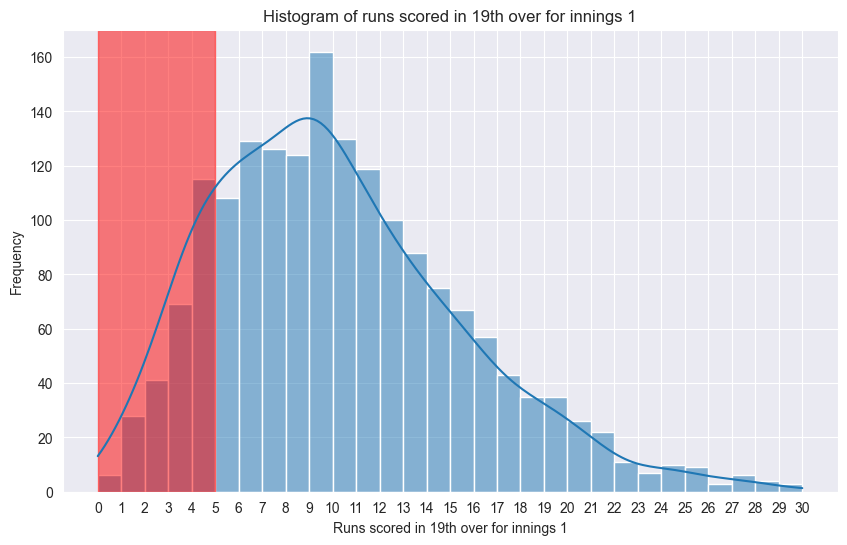

In [17]:
#histogram of runs scored in 19th over
plt.figure(figsize=(10,6))
sns.histplot(sum_runs_19th_over['total_runs'],bins=range(0,31,1),kde=True)
plt.xticks(range(0,31,1))
plt.axvspan(0, 5, color='red', alpha=0.5)
plt.xlabel("Runs scored in 19th over for innings 1")
plt.ylabel("Frequency")
plt.title("Histogram of runs scored in 19th over for innings 1")
plt.show()


### performing same for first innings and second innings separately

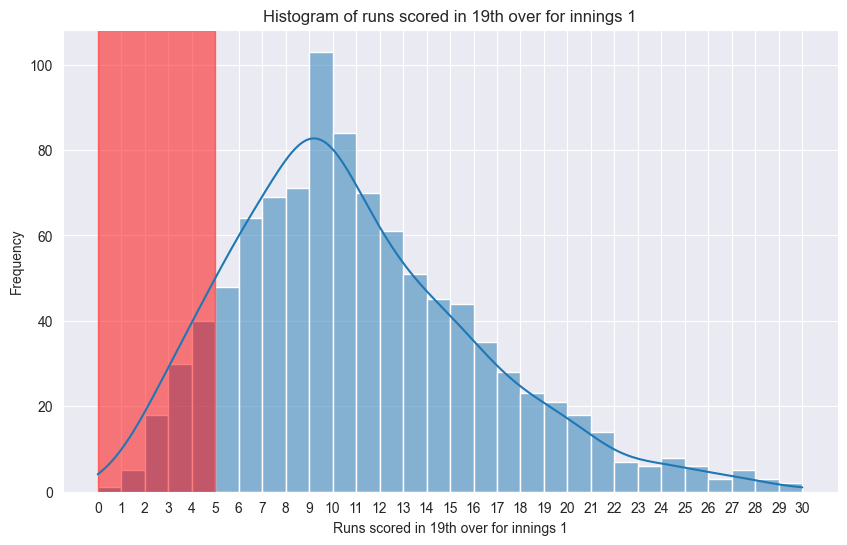

In [18]:
#filter dataframe for innings 1 from sum_runs_19th_over
sum_runs_19th_over_innings1=sum_runs_19th_over[sum_runs_19th_over['innings_no']==1]
sum_runs_19th_over_innings1
#overall distribution of runs scored in 19th over for innings 1
plt.figure(figsize=(10,6))
sns.histplot(sum_runs_19th_over_innings1['total_runs'],bins=range(0,31,1),kde=True)
plt.xticks(range(0,31,1))
plt.axvspan(0, 5, color='red', alpha=0.5)
plt.xlabel("Runs scored in 19th over for innings 1")
plt.ylabel("Frequency")
plt.title("Histogram of runs scored in 19th over for innings 1")
plt.show()


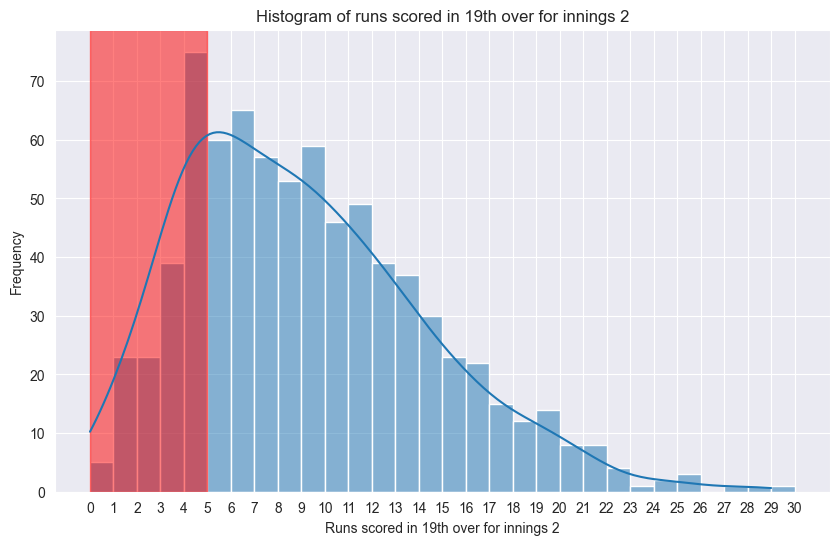

In [19]:
#filter dataframe for innings 2 from sum_runs_19th_over
sum_runs_19th_over_innings2=sum_runs_19th_over[sum_runs_19th_over['innings_no']==2]
sum_runs_19th_over_innings2
#overall distribution of runs scored in 19th over for innings 1
plt.figure(figsize=(10,6))
sns.histplot(sum_runs_19th_over_innings2['total_runs'],bins=range(0,31,1),kde=True)
plt.xticks(range(0,31,1))
plt.axvspan(0, 5, color='red', alpha=0.5)
plt.xlabel("Runs scored in 19th over for innings 2")
plt.ylabel("Frequency")
plt.title("Histogram of runs scored in 19th over for innings 2")
plt.show()


## number of matches where 19th over had less than 6 runs over for each innings

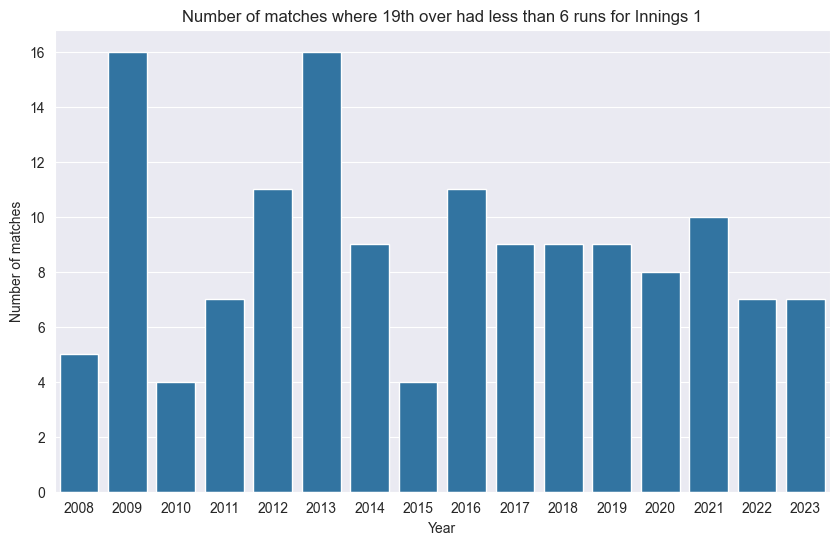

In [20]:
#plot number of matches where 19th over had less than 6 runs for innings  1
plt.figure(figsize=(10,6))
sns.countplot(x='year',data=sum_runs_19th_over_innings1[sum_runs_19th_over_innings1['total_runs']<6])
plt.xlabel("Year")
plt.ylabel("Number of matches")
plt.title("Number of matches where 19th over had less than 6 runs for Innings 1")
plt.show()



# Analysing number of sixes hit in 19th over for each innings

In [21]:
#group by year and match_id and sum the number of sixes hit in 19th over
sum_sixes_19th_over=filtered_df.groupby(['year','match_id','innings_no'])['issix'].sum().reset_index()
sum_sixes_19th_over

,year,match_id,innings_no,issix
0,2008,335982,1.0,2
1,2008,335983,1.0,1
2,2008,335983,2.0,0
3,2008,335984,1.0,0
4,2008,335985,1.0,1
...,...,...,...,...
1753,2023,1370350,2.0,0
1754,2023,1370351,1.0,0
1755,2023,1370352,1.0,1
1756,2023,1370352,2.0,0


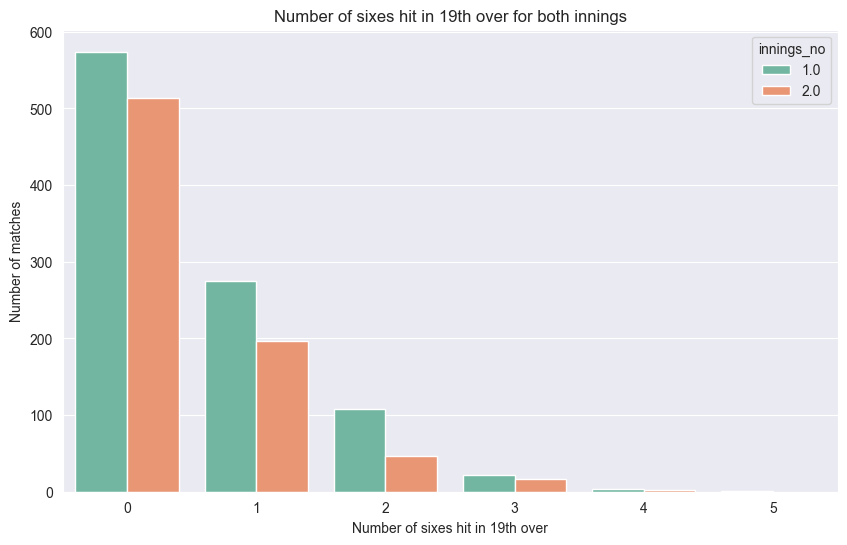

In [22]:
#number of sixes hit in 19th over for both innings with countplot and hue as innings_no
plt.figure(figsize=(10,6))
sns.countplot(x='issix',data=sum_sixes_19th_over,hue='innings_no',palette='Set2')
plt.xlabel("Number of sixes hit in 19th over")
plt.ylabel("Number of matches")
plt.title("Number of sixes hit in 19th over for both innings")
plt.show()


## since innings have unequal distribution, we will calculate proportion of sixes hit for each innings

In [23]:
proportion_data = sum_sixes_19th_over.groupby('innings_no')['issix'].value_counts(normalize=True).reset_index(name='proportion')
proportion_data

,innings_no,issix,proportion
0,1.0,0,0.583927
1,1.0,1,0.279756
2,1.0,2,0.109868
3,1.0,3,0.022380
4,1.0,4,0.003052
5,1.0,5,0.001017
6,2.0,0,0.661935
7,2.0,1,0.254194
8,2.0,2,0.059355
9,2.0,3,0.021935


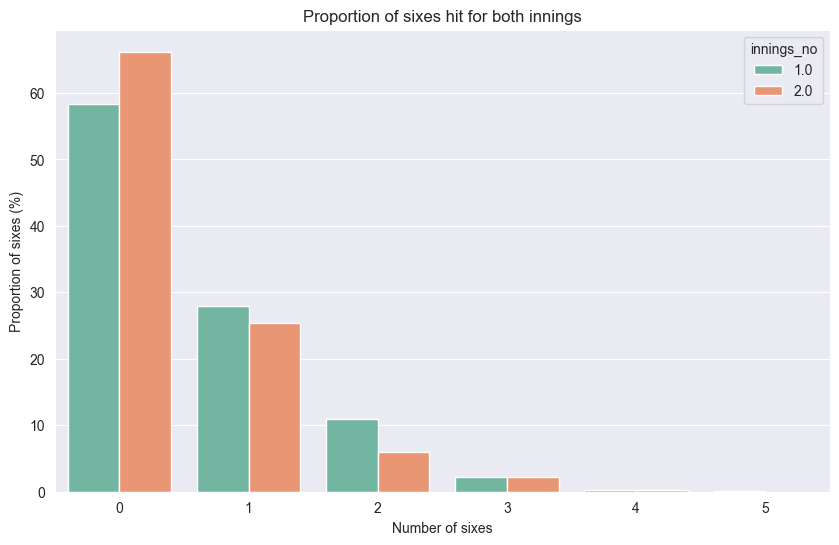

In [24]:
# Convert the proportion to percentage for easier interpretation
proportion_data['proportion'] *= 100

plt.figure(figsize=(10,6))
sns.barplot(x='issix', y='proportion', hue='innings_no', data=proportion_data, palette='Set2')
plt.xlabel("Number of sixes")
plt.ylabel("Proportion of sixes (%)")
plt.title("Proportion of sixes hit for both innings")
plt.show()

# Analysing number of fours hit in 19th over

In [25]:
#group by year and match_id and sum the number of fours hit in 19th over
sum_fours_19th_over=filtered_df.groupby(['year','match_id','innings_no'])['isfour'].sum().reset_index()
sum_fours_19th_over

,year,match_id,innings_no,isfour
0,2008,335982,1.0,2
1,2008,335983,1.0,1
2,2008,335983,2.0,0
3,2008,335984,1.0,2
4,2008,335985,1.0,0
...,...,...,...,...
1753,2023,1370350,2.0,2
1754,2023,1370351,1.0,0
1755,2023,1370352,1.0,0
1756,2023,1370352,2.0,0


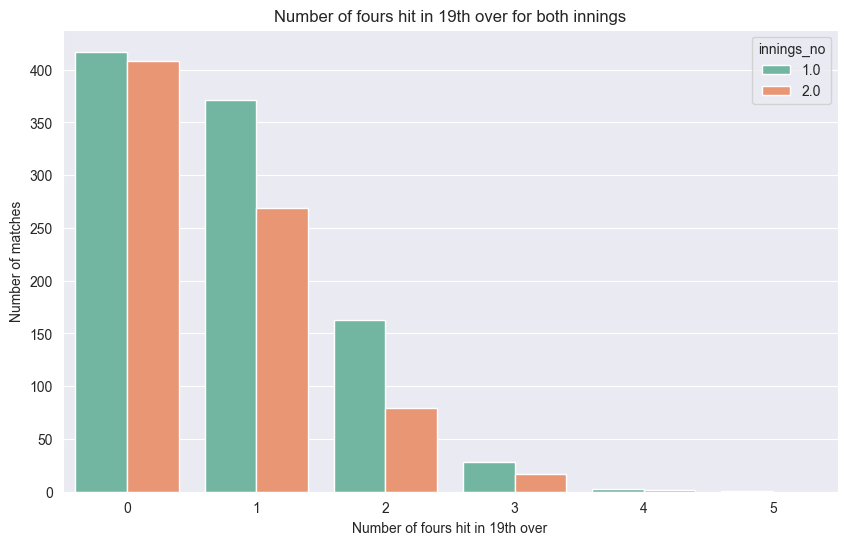

In [26]:
#number of sixes hit in 19th over for both innings with countplot and hue as innings_no
plt.figure(figsize=(10,6))
sns.countplot(x='isfour',data=sum_fours_19th_over,hue='innings_no',palette='Set2')
plt.xlabel("Number of fours hit in 19th over")
plt.ylabel("Number of matches")
plt.title("Number of fours hit in 19th over for both innings")
plt.show()


## since innings have unequal distribution, we will calculate proportion of fours hit for each innings

In [27]:
proportion_data = sum_fours_19th_over.groupby('innings_no')['isfour'].value_counts(normalize=True).reset_index(name='proportion')
proportion_data


,innings_no,isfour,proportion
0,1.0,0,0.424212
1,1.0,1,0.377416
2,1.0,2,0.165819
3,1.0,3,0.028484
4,1.0,4,0.003052
5,1.0,5,0.001017
6,2.0,0,0.526452
7,2.0,1,0.347097
8,2.0,2,0.101935
9,2.0,3,0.021935


In [28]:
# Convert the proportion to percentage for easier interpretation
proportion_data['proportion'] *= 100

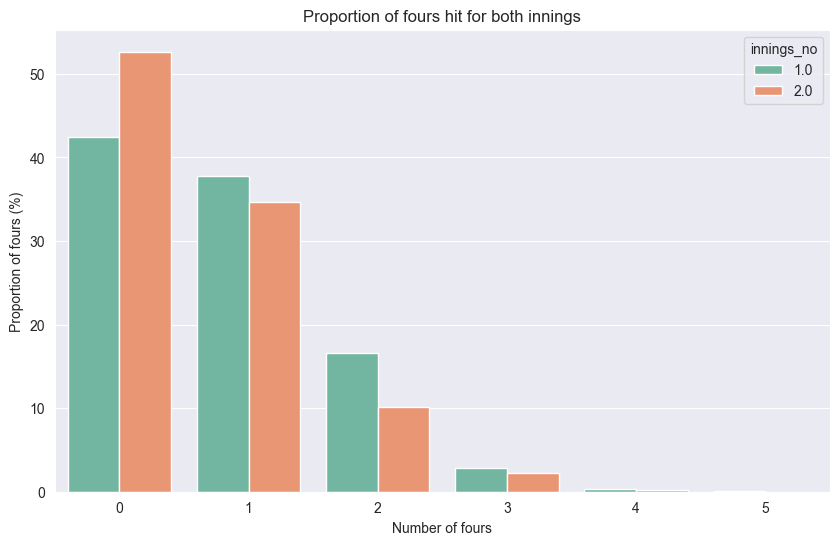

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(x='isfour', y='proportion', hue='innings_no', data=proportion_data, palette='Set2')
plt.xlabel("Number of fours")
plt.ylabel("Proportion of fours (%)")
plt.title("Proportion of fours hit for both innings")
plt.show()


## Insights: Surprised to find that boundaries are not flowing freely in the death over of a T20 match

# Analysing first innings

## we are going to find out for the first innings , if there is any correlation between runs scored to matches won

In [30]:
sum_runs_19th_over_innings1

,year,match_id,innings_no,total_runs
0,2008,335982,1.0,21
1,2008,335983,1.0,15
3,2008,335984,1.0,10
4,2008,335985,1.0,9
6,2008,335986,1.0,5
...,...,...,...,...
1750,2023,1359544,1.0,13
1752,2023,1370350,1.0,9
1754,2023,1370351,1.0,6
1755,2023,1370352,1.0,9


In [31]:
historical_df

,season,title,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,...,umpire2,match_referee,toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing11,team2_playing11,debut_players
0,2008,1st match,335982,Royal Challengers Bangalore Vs Kolkata Knight ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-18,T20,4341,KKR,...,RE Koertzen,J Srinath,RCB,bowl,KKR,KKR won by 140 runs,10384.0,"[""2024"",""10384"",""2230"",""11984"",""19647"",""7704"",...","[""2281"",""7130"",""49752"",""2232"",""12049"",""3947"",""...","[""48965""]"
1,2008,2nd match,335983,Kings Xi Punjab Vs Chennai Super Kings 2Nd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4343,Super Kings,...,SL Shastri,S Venkataraghavan,Super Kings,bat,Super Kings,Super Kings won by 33 runs,6256.0,"[""9900"",""2119"",""6256"",""7593"",""15716"",""9989"",""8...","[""15851"",""9235"",""9587"",""7716"",""6259"",""11399"",""...","[""53549""]"
2,2008,3rd match,335984,Delhi Daredevils Vs Rajasthan Royals 3Rd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4345,Royals,...,GA Pratapkumar,GR Viswanath,Royals,bat,Daredevils,Daredevils won by 9 wickets (with 29 balls rem...,11374.0,"[""54936"",""15473"",""10125"",""7632"",""3329"",""49247""...","[""7773"",""7781"",""15887"",""47624"",""8813"",""7520"",""...","[""51109"",""47100"",""54936""]"
3,2008,4th match,335986,Kolkata Knight Riders Vs Deccan Chargers 4Th M...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4347,Chargers,...,K Hariharan,FM Engineer,Chargers,bat,KKR,KKR won by 5 wickets (with 6 balls remaining),11984.0,"[""4176"",""8163"",""3317"",""4382"",""48405"",""9570"",""7...","[""51216"",""10384"",""2230"",""2024"",""11984"",""19647""...","[""3317""]"
4,2008,5th match,335985,Mumbai Indians Vs Royal Challengers Bangalore ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4346,Mumbai,...,SJ Davis,J Srinath,Mumbai,bat,RCB,RCB won by 5 wickets (with 2 balls remaining),3947.0,"[""17850"",""1988"",""7447"",""8742"",""48349"",""47308"",...","[""2120"",""2281"",""44930"",""2232"",""49752"",""3947"",""...","[""7804""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,2023,69th Match,1359543,Mumbai Indians Vs Sunrisers Hyderabad 69Th Match,1345038,Indian Premier League in India - 2023 (2023),2023-05-21,T20,5143,Sunrisers,...,RJ Tucker,P Dharmani,Mumbai,bowl,Mumbai,Mumbai won by 8 wickets (with 12 balls remaining),96335.0,"[""101306"",""108645"",""59599"",""61634"",""80639"",""70...","[""75325"",""48405"",""96335"",""61990"",""83439"",""1027...",[]
1021,2023,Qualifier 1,1370350,Chennai Super Kings Vs Gujarat Titans Qualifier 1,1345038,Indian Premier League in India - 2023 (2023),2023-05-23,T20,4343,Super Kings,...,CB Gaffaney,M Nayyar,Titans,bowl,Super Kings,Super Kings won by 15 runs,95094.0,"[""105938"",""95094"",""58403"",""74975"",""51096"",""899...","[""66722"",""51216"",""95316"",""70633"",""61690"",""5389...",[]
1022,2023,Eliminator,1370351,Lucknow Super Giants Vs Mumbai Indians Eliminator,1345038,Indian Premier League in India - 2023 (2023),2023-05-24,T20,4346,Mumbai,...,VK Sharma,V Narayan Kutty,Mumbai,bat,Mumbai,Mumbai won by 81 runs,106837.0,"[""75325"",""48405"",""96335"",""61990"",""104396"",""834...","[""95329"",""56832"",""88977"",""63224"",""54212"",""1027...",[]
1023,2023,Qualifier 2,1370352,Gujarat Titans Vs Mumbai Indians Qualifier 2,1345038,Indian Premier League in India - 2023 (2023),2023-05-26,T20,6904,Titans,...,RJ Tucker,J Srinath,Mumbai,bowl,Titans,Titans won by 62 runs,95316.0,"[""85975"",""51216"",""95316"",""102753"",""70633"",""791...","[""75325"",""106837"",""48405"",""102738"",""96335"",""61...",[]


In [32]:
batting_first_winner=historical_df[(historical_df['team1_name']==historical_df['match_winner'])]
batting_first_winner

,season,title,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,...,umpire2,match_referee,toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing11,team2_playing11,debut_players
0,2008,1st match,335982,Royal Challengers Bangalore Vs Kolkata Knight ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-18,T20,4341,KKR,...,RE Koertzen,J Srinath,RCB,bowl,KKR,KKR won by 140 runs,10384.0,"[""2024"",""10384"",""2230"",""11984"",""19647"",""7704"",...","[""2281"",""7130"",""49752"",""2232"",""12049"",""3947"",""...","[""48965""]"
1,2008,2nd match,335983,Kings Xi Punjab Vs Chennai Super Kings 2Nd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4343,Super Kings,...,SL Shastri,S Venkataraghavan,Super Kings,bat,Super Kings,Super Kings won by 33 runs,6256.0,"[""9900"",""2119"",""6256"",""7593"",""15716"",""9989"",""8...","[""15851"",""9235"",""9587"",""7716"",""6259"",""11399"",""...","[""53549""]"
7,2008,8th match,335989,Chennai Super Kings Vs Mumbai Indians 8Th Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-23,T20,4343,Super Kings,...,GA Pratapkumar,FM Engineer,Mumbai,bowl,Super Kings,Super Kings won by 6 runs,2119.0,"[""9900"",""2119"",""6256"",""15716"",""7593"",""9989"",""8...","[""17850"",""1988"",""8742"",""2228"",""45257"",""47308"",...","[""52946""]"
9,2008,10th match,335991,Kings Xi Punjab Vs Mumbai Indians 10Th Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-25,T20,4342,Kings XI,...,AM Saheba,FM Engineer,Mumbai,bowl,Kings XI,Kings XI won by 66 runs,9587.0,"[""15851"",""11399"",""9587"",""7716"",""6405"",""6315"",""...","[""17850"",""1988"",""8742"",""45257"",""15317"",""2228"",...",[]
14,2008,15th match,335996,Royal Challengers Bangalore Vs Chennai Super K...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-28,T20,4343,Super Kings,...,RB Tiffin,J Srinath,Super Kings,bat,Super Kings,Super Kings won by 13 runs,7593.0,"[""9900"",""2119"",""6256"",""15716"",""7593"",""9989"",""8...","[""12018"",""7130"",""44930"",""2232"",""3947"",""49752"",...","[""12018""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,2023,67th Match,1359541,Delhi Capitals Vs Chennai Super Kings 67Th Match,1345038,Indian Premier League in India - 2023 (2023),2023-05-20,T20,4343,Super Kings,...,NA Patwardhan,S Verma,Super Kings,bat,Super Kings,Super Kings won by 77 runs,95094.0,"[""105938"",""95094"",""58403"",""74975"",""7593"",""4924...","[""87603"",""95315"",""48739"",""72363"",""53649"",""1109...",[]
1018,2023,68th Match,1359542,Kolkata Knight Riders Vs Lucknow Super Giants ...,1345038,Indian Premier League in India - 2023 (2023),2023-05-20,T20,6903,Super Giants,...,UV Gandhe,M Nayyar,KKR,bowl,Super Giants,Super Giants won by 1 run,70405.0,"[""95329"",""108519"",""58406"",""88977"",""54212"",""632...","[""111976"",""52290"",""81147"",""70411"",""90143"",""755...",[]
1021,2023,Qualifier 1,1370350,Chennai Super Kings Vs Gujarat Titans Qualifier 1,1345038,Indian Premier League in India - 2023 (2023),2023-05-23,T20,4343,Super Kings,...,CB Gaffaney,M Nayyar,Titans,bowl,Super Kings,Super Kings won by 15 runs,95094.0,"[""105938"",""95094"",""58403"",""74975"",""51096"",""899...","[""66722"",""51216"",""95316"",""70633"",""61690"",""5389...",[]
1022,2023,Eliminator,1370351,Lucknow Super Giants Vs Mumbai Indians Eliminator,1345038,Indian Premier League in India - 2023 (2023),2023-05-24,T20,4346,Mumbai,...,VK Sharma,V Narayan Kutty,Mumbai,bat,Mumbai,Mumbai won by 81 runs,106837.0,"[""75325"",""48405"",""96335"",""61990"",""104396"",""834...","[""95329"",""56832"",""88977"",""63224"",""54212"",""1027...",[]


In [33]:
#total number of matches where team batting first won
total_batting_first_winner=batting_first_winner['match_id'].nunique()
print("Total number of matches where team batting first won: ",total_batting_first_winner)

Total number of matches where team batting first won:  457


In [34]:
#total number of matches where team batting first lost
batting_second_winner=historical_df[(historical_df['team2_name']==historical_df['match_winner'])]
batting_second_winner

,season,title,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,...,umpire2,match_referee,toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing11,team2_playing11,debut_players
2,2008,3rd match,335984,Delhi Daredevils Vs Rajasthan Royals 3Rd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4345,Royals,...,GA Pratapkumar,GR Viswanath,Royals,bat,Daredevils,Daredevils won by 9 wickets (with 29 balls rem...,11374.0,"[""54936"",""15473"",""10125"",""7632"",""3329"",""49247""...","[""7773"",""7781"",""15887"",""47624"",""8813"",""7520"",""...","[""51109"",""47100"",""54936""]"
3,2008,4th match,335986,Kolkata Knight Riders Vs Deccan Chargers 4Th M...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4347,Chargers,...,K Hariharan,FM Engineer,Chargers,bat,KKR,KKR won by 5 wickets (with 6 balls remaining),11984.0,"[""4176"",""8163"",""3317"",""4382"",""48405"",""9570"",""7...","[""51216"",""10384"",""2230"",""2024"",""11984"",""19647""...","[""3317""]"
4,2008,5th match,335985,Mumbai Indians Vs Royal Challengers Bangalore ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4346,Mumbai,...,SJ Davis,J Srinath,Mumbai,bat,RCB,RCB won by 5 wickets (with 2 balls remaining),3947.0,"[""17850"",""1988"",""7447"",""8742"",""48349"",""47308"",...","[""2120"",""2281"",""44930"",""2232"",""49752"",""3947"",""...","[""7804""]"
5,2008,6th match,335987,Rajasthan Royals Vs Kings Xi Punjab 6Th Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-21,T20,4342,Kings XI,...,RB Tiffin,S Venkataraghavan,Kings XI,bat,Royals,Royals won by 6 wickets (with 11 balls remaining),10125.0,"[""15851"",""9235"",""9587"",""6315"",""7716"",""11399"",""...","[""7632"",""9257"",""15473"",""10125"",""3329"",""49247"",...",[]
6,2008,7th match,335988,Deccan Chargers Vs Delhi Daredevils 7Th Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-22,T20,4347,Chargers,...,IL Howell,Talat Ali,Chargers,bat,Daredevils,Daredevils won by 9 wickets (with 42 balls rem...,7781.0,"[""4176"",""8163"",""3317"",""4382"",""48405"",""4169"",""8...","[""7773"",""7781"",""15887"",""8270"",""8813"",""47624"",""...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,2023,65th Match,1359539,Sunrisers Hyderabad Vs Royal Challengers Banga...,1345038,Indian Premier League in India - 2023 (2023),2023-05-18,T20,5143,Sunrisers,...,VK Sharma,J Srinath,RCB,bowl,RCB,RCB won by 8 wickets (with 4 balls remaining),49752.0,"[""79597"",""95320"",""61999"",""70277"",""61634"",""8402...","[""49752"",""46933"",""54222"",""54369"",""81197"",""1013...",[]
1016,2023,66th Match,1359540,Punjab Kings Vs Rajasthan Royals 66Th Match,1345038,Indian Premier League in India - 2023 (2023),2023-05-19,T20,4342,Punjab Kings,...,RJ Tucker,P Dharmani,Royals,bowl,Royals,Royals won by 4 wickets (with 2 balls remaining),100878.0,"[""80817"",""103766"",""15887"",""101424"",""59832"",""72...","[""61325"",""102743"",""53271"",""100878"",""60806"",""72...",[]
1019,2023,70th Match,1359544,Royal Challengers Bangalore Vs Gujarat Titans ...,1345038,Indian Premier League in India - 2023 (2023),2023-05-21,T20,4340,RCB,...,VK Sharma,J Srinath,Titans,bowl,Titans,Titans won by 6 wickets (with 5 balls remaining),95316.0,"[""114290"",""49752"",""46933"",""54222"",""81197"",""543...","[""103597"",""51216"",""95316"",""63509"",""61690"",""538...","[""114290""]"
1020,2023,69th Match,1359543,Mumbai Indians Vs Sunrisers Hyderabad 69Th Match,1345038,Indian Premier League in India - 2023 (2023),2023-05-21,T20,5143,Sunrisers,...,RJ Tucker,P Dharmani,Mumbai,bowl,Mumbai,Mumbai won by 8 wickets (with 12 balls remaining),96335.0,"[""101306"",""108645"",""59599"",""61634"",""80639"",""70...","[""75325"",""48405"",""96335"",""61990"",""83439"",""1027...",[]


In [35]:
#total number of matches where team batting second won
total_batting_second_winner=batting_second_winner['match_id'].nunique()
print("Total number of matches where team batting second won: ",total_batting_second_winner)

Total number of matches where team batting second won:  548


In [36]:
#from sum_runs_19th_over_innings1, add new column win ,check match_id is present in batting_first_winner ,if yes, set to 1 else 0
sum_runs_19th_over_innings1['result']=sum_runs_19th_over_innings1['match_id'].apply(lambda x: 'won' if x in batting_first_winner['match_id'].values else 'lost')
sum_runs_19th_over_innings1

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_54950/1259204658.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_runs_19th_over_innings1['result']=sum_runs_19th_over_innings1['match_id'].apply(lambda x: 'won' if x in batting_first_winner['match_id'].values else 'lost')


,year,match_id,innings_no,total_runs,result
0,2008,335982,1.0,21,won
1,2008,335983,1.0,15,won
3,2008,335984,1.0,10,lost
4,2008,335985,1.0,9,lost
6,2008,335986,1.0,5,lost
...,...,...,...,...,...
1750,2023,1359544,1.0,13,lost
1752,2023,1370350,1.0,9,won
1754,2023,1370351,1.0,6,won
1755,2023,1370352,1.0,9,won


In [37]:
##as expected GT did not win the final and hence calculation is correct
sum_runs_19th_over_innings1[sum_runs_19th_over_innings1['match_id']==1370353]

,year,match_id,innings_no,total_runs,result
1757,2023,1370353,1.0,18,lost


# Distribution of wins and losses for team batting first who batted in 19th over

In [38]:
sum_runs_19th_over_innings1['result'].value_counts(normalize=True)*100

result
lost    54.425229
won     45.574771
Name: proportion, dtype: float64

In [39]:
sum_runs_19th_over_innings1['result'].value_counts()

result
lost    535
won     448
Name: count, dtype: int64

## insights : 45% of the matches were won by the team batting first

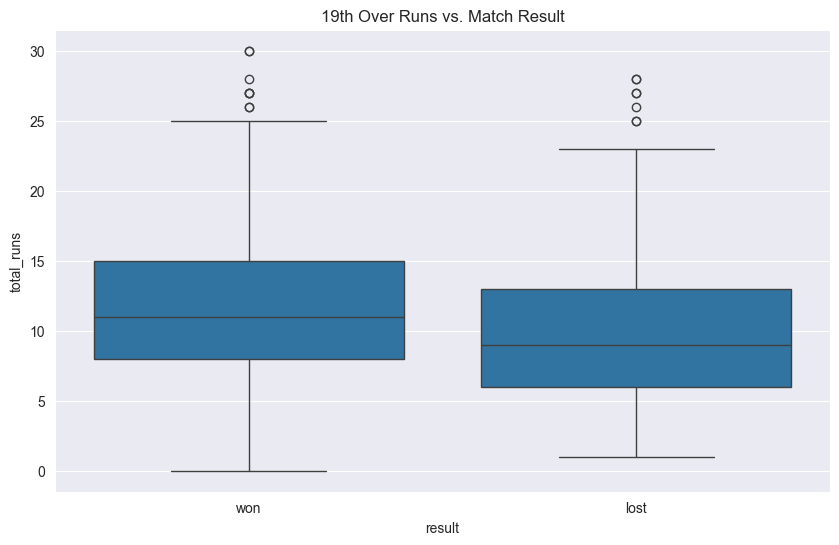

In [40]:
# Visualization with Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='total_runs', data=sum_runs_19th_over_innings1)
plt.title('19th Over Runs vs. Match Result')
plt.show()

In [41]:
#for each run scored in 19th over,find the win percentage
win_percentage={}
counter_val={}
for i in list(sum_runs_19th_over_innings1['total_runs'].unique()):
    win_percentage[i]=round(sum_runs_19th_over_innings1[sum_runs_19th_over_innings1['total_runs']==i]['result'].value_counts(normalize=True).get('won',0)*100,2)
    counter_val[i]=len(sum_runs_19th_over_innings1[(sum_runs_19th_over_innings1['total_runs']==i) & (sum_runs_19th_over_innings1['result']=='won')])
    

In [42]:
#sort the dictionary based on keys
win_percentage=dict(sorted(win_percentage.items()))
win_percentage

{0: 100.0,
 1: 40.0,
 2: 27.78,
 3: 33.33,
 4: 30.0,
 5: 37.5,
 6: 34.38,
 7: 39.13,
 8: 47.89,
 9: 48.54,
 10: 42.86,
 11: 35.71,
 12: 47.54,
 13: 49.02,
 14: 40.0,
 15: 54.55,
 16: 65.71,
 17: 57.14,
 18: 52.17,
 19: 57.14,
 20: 33.33,
 21: 71.43,
 22: 100.0,
 23: 66.67,
 24: 100.0,
 25: 66.67,
 26: 66.67,
 27: 60.0,
 28: 33.33,
 30: 100.0}

In [43]:
counter_val=dict(sorted(counter_val.items()))
counter_val

{0: 1,
 1: 2,
 2: 5,
 3: 10,
 4: 12,
 5: 18,
 6: 22,
 7: 27,
 8: 34,
 9: 50,
 10: 36,
 11: 25,
 12: 29,
 13: 25,
 14: 18,
 15: 24,
 16: 23,
 17: 16,
 18: 12,
 19: 12,
 20: 6,
 21: 10,
 22: 7,
 23: 4,
 24: 8,
 25: 4,
 26: 2,
 27: 3,
 28: 1,
 30: 2}

In [44]:
#sum of counter values should be equal to 448
sum(counter_val.values())

448

In [45]:
data = pd.DataFrame({
    'runs': win_percentage.keys(),
    'win_percentage': win_percentage.values(),
    'frequency': [counter_val[run] for run in win_percentage.keys()]
})
data

,runs,win_percentage,frequency
0,0,100.00,1
1,1,40.00,2
2,2,27.78,5
3,3,33.33,10
4,4,30.00,12
5,5,37.50,18
6,6,34.38,22
7,7,39.13,27
8,8,47.89,34
9,9,48.54,50


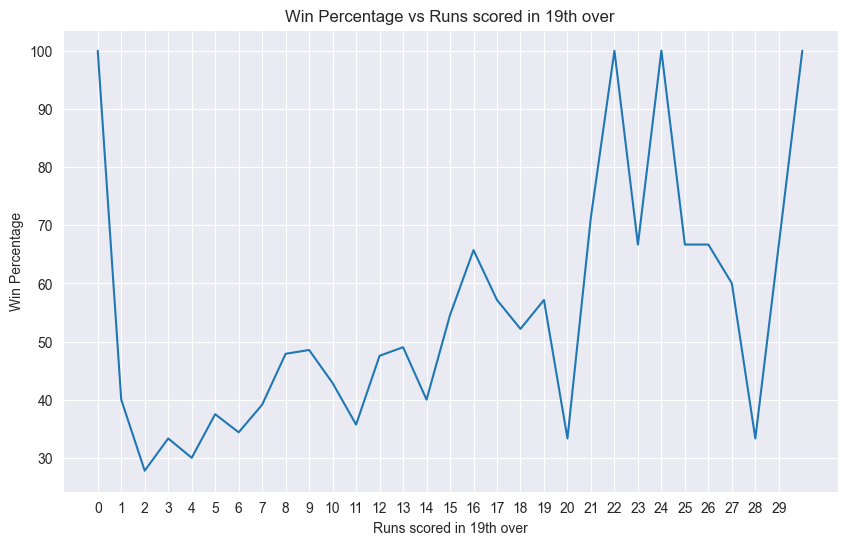

In [46]:
#line plot for win percentage vs runs scored in 19th over
plt.figure(figsize=(10,6))
sns.lineplot(x='runs',y='win_percentage',data=data)
plt.xticks(range(0,max(win_percentage.keys()),1))
plt.xlabel("Runs scored in 19th over")
plt.ylabel("Win Percentage")
plt.title("Win Percentage vs Runs scored in 19th over")
plt.show()

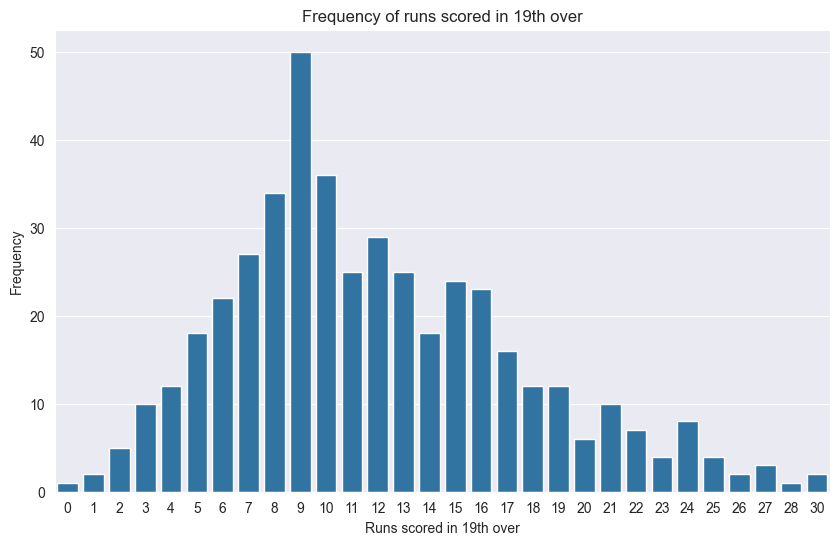

In [47]:
#plot frequncy of runs scored in 19th over
plt.figure(figsize=(10,6))
sns.barplot(x='runs',y='frequency',data=data)
plt.xticks(range(0,max(win_percentage.keys()),1))
plt.xlabel("Runs scored in 19th over")
plt.ylabel("Frequency")
plt.title("Frequency of runs scored in 19th over")
plt.show()


In [57]:
import plotly.express as px
data['custom_hover_text'] = data.apply(lambda row: f"Runs: {row['runs']}<br>Win Percentage: {round(row['win_percentage'],2)}%<br>Matches Played: {row['frequency']}", axis=1)

# Create an interactive line plot with custom hover text
fig = px.line(data, x='runs', y='win_percentage', title='Win Percentage vs Runs Scored in 19th Over')

# Add points to the line plot to make them interactive, with the custom hover text
fig.add_scatter(x=data['runs'], y=data['win_percentage'], mode='markers',hoverinfo='text+x+y', hovertext=data['custom_hover_text'],
                name='Win Percentage Data')

# Update traces to not show the default hover info, instead only show custom hover info
fig.update_traces(hovertemplate=data['custom_hover_text'])

# Update layout for a better look
fig.update_layout(
    xaxis_title="Runs Scored in 19th Over",
    yaxis_title="Win Percentage",
    xaxis=dict(tickmode='linear', tick0=0, dtick=1) ,
    legend_title_text='Data Legend'
)

# Show plot
fig.show()

## Verdict: if team batting first scores more than 6 runs in 19th over, they have a higher chance of winning , 
1.there are outlies for win % for 0 runs scored in 19th over, but number of matches are only 1

# The goal to see the amount of runs a batter batting first scores in the 19th over of the match
## about the dataset- 
1. ball_by_ball contains detail of event of every ball bowled 
2. historical data contains result of each match,toss, venue etc.

In [82]:
historical_df=pd.read_csv("./data/ipl_historical.csv")
historical_df.head()

,season,title,match_id,match_name,series_id,series_name,match_date,match_format,team1_id,team1_name,...,umpire2,match_referee,toss_winner,toss_winner_choice,match_winner,match_result_text,mom_player,team1_playing11,team2_playing11,debut_players
0,2008,1st match,335982,Royal Challengers Bangalore Vs Kolkata Knight ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-18,T20,4341,KKR,...,RE Koertzen,J Srinath,RCB,bowl,KKR,KKR won by 140 runs,10384.0,"[""2024"",""10384"",""2230"",""11984"",""19647"",""7704"",...","[""2281"",""7130"",""49752"",""2232"",""12049"",""3947"",""...","[""48965""]"
1,2008,2nd match,335983,Kings Xi Punjab Vs Chennai Super Kings 2Nd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4343,Super Kings,...,SL Shastri,S Venkataraghavan,Super Kings,bat,Super Kings,Super Kings won by 33 runs,6256.0,"[""9900"",""2119"",""6256"",""7593"",""15716"",""9989"",""8...","[""15851"",""9235"",""9587"",""7716"",""6259"",""11399"",""...","[""53549""]"
2,2008,3rd match,335984,Delhi Daredevils Vs Rajasthan Royals 3Rd Match,313494,Indian Premier League in India - 2008 (2007/08),2008-04-19,T20,4345,Royals,...,GA Pratapkumar,GR Viswanath,Royals,bat,Daredevils,Daredevils won by 9 wickets (with 29 balls rem...,11374.0,"[""54936"",""15473"",""10125"",""7632"",""3329"",""49247""...","[""7773"",""7781"",""15887"",""47624"",""8813"",""7520"",""...","[""51109"",""47100"",""54936""]"
3,2008,4th match,335986,Kolkata Knight Riders Vs Deccan Chargers 4Th M...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4347,Chargers,...,K Hariharan,FM Engineer,Chargers,bat,KKR,KKR won by 5 wickets (with 6 balls remaining),11984.0,"[""4176"",""8163"",""3317"",""4382"",""48405"",""9570"",""7...","[""51216"",""10384"",""2230"",""2024"",""11984"",""19647""...","[""3317""]"
4,2008,5th match,335985,Mumbai Indians Vs Royal Challengers Bangalore ...,313494,Indian Premier League in India - 2008 (2007/08),2008-04-20,T20,4346,Mumbai,...,SJ Davis,J Srinath,Mumbai,bat,RCB,RCB won by 5 wickets (with 2 balls remaining),3947.0,"[""17850"",""1988"",""7447"",""8742"",""48349"",""47308"",...","[""2120"",""2281"",""44930"",""2232"",""49752"",""3947"",""...","[""7804""]"


In [83]:
#ipl ball by ball
ball_by_ball_df=pd.read_csv("./data/ipl_ball_by_ball_data.csv")
ball_by_ball_df

/var/folders/fd/_vqm4qqj113dx_9dmjpjrhfw0000gn/T/ipykernel_56027/2187232362.py:2: DtypeWarning: Columns (10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  ball_by_ball_df=pd.read_csv("./data/ipl_ball_by_ball_data.csv")


,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,issix,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets
0,1165643,1178429,1.0,51216.0,58274.0,1.0,1.0,0.1,1.0,1.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
1,1165643,1178429,1.0,48927.0,58274.0,1.0,2.0,0.2,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
2,1165643,1178429,1.0,48927.0,58274.0,1.0,3.0,0.3,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
3,1165643,1178429,1.0,48927.0,58274.0,1.0,4.0,0.4,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
4,1165643,1178429,1.0,48927.0,58274.0,1.0,5.0,0.5,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243652,313494,336013,2.0,11399.0,9022.0,20.0,2.0,19.2,2.0,2.0,...,False,False,0.0,0.0,0.0,0.0,0.0,NaN,163.0,6.0
243653,313494,336013,2.0,11399.0,9022.0,20.0,3.0,19.3,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,11399.0,163.0,7.0
243654,313494,336013,2.0,47185.0,9022.0,20.0,4.0,19.4,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,47185.0,163.0,8.0
243655,313494,336013,2.0,47184.0,9022.0,20.0,5.0,19.5,0.0,0.0,...,False,True,0.0,0.0,0.0,0.0,0.0,47184.0,163.0,9.0


In [84]:
#get year from historical data based on match_id
def get_year(match_id):
    return historical_df[historical_df['match_id']==match_id]['season'].values[0]
ball_by_ball_df['year']=ball_by_ball_df['match_id'].progress_apply(get_year)
ball_by_ball_df

100%|██████████| 243657/243657 [00:19<00:00, 12483.10it/s]


,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
0,1165643,1178429,1.0,51216.0,58274.0,1.0,1.0,0.1,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
1,1165643,1178429,1.0,48927.0,58274.0,1.0,2.0,0.2,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
2,1165643,1178429,1.0,48927.0,58274.0,1.0,3.0,0.3,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
3,1165643,1178429,1.0,48927.0,58274.0,1.0,4.0,0.4,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
4,1165643,1178429,1.0,48927.0,58274.0,1.0,5.0,0.5,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243652,313494,336013,2.0,11399.0,9022.0,20.0,2.0,19.2,2.0,2.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,163.0,6.0,2008
243653,313494,336013,2.0,11399.0,9022.0,20.0,3.0,19.3,0.0,0.0,...,True,0.0,0.0,0.0,0.0,0.0,11399.0,163.0,7.0,2008
243654,313494,336013,2.0,47185.0,9022.0,20.0,4.0,19.4,0.0,0.0,...,True,0.0,0.0,0.0,0.0,0.0,47185.0,163.0,8.0,2008
243655,313494,336013,2.0,47184.0,9022.0,20.0,5.0,19.5,0.0,0.0,...,True,0.0,0.0,0.0,0.0,0.0,47184.0,163.0,9.0,2008


In [85]:
#group by batsman_id,match_id,innings_no and sum total_runs
batsman_runs=ball_by_ball_df.groupby(['batsman_id','year','match_id','innings_no'])['batsman_runs'].sum().reset_index()
batsman_runs

,batsman_id,year,match_id,innings_no,batsman_runs
0,1934.0,2008,336012,2.0,40.0
1,1934.0,2008,336018,2.0,12.0
2,1934.0,2008,336021,2.0,0.0
3,1934.0,2008,336024,1.0,23.0
4,1934.0,2008,336028,2.0,65.0
...,...,...,...,...,...
15395,110981.0,2022,1304054,1.0,11.0
15396,111976.0,2022,1304087,1.0,0.0
15397,111976.0,2022,1304099,2.0,2.0
15398,111976.0,2023,1359521,1.0,0.0


In [86]:
#filter batters who scored 100 runs
batsman_runs_100=batsman_runs[batsman_runs['batsman_runs']>=100]
batsman_runs_100

,batsman_id,year,match_id,innings_no,batsman_runs
37,1934.0,2011,501210,1.0,100.0
101,1988.0,2008,336018,2.0,114.0
600,4176.0,2008,335994,2.0,109.0
655,4176.0,2011,501260,1.0,106.0
698,4382.0,2008,335990,1.0,117.0
...,...,...,...,...,...
14794,95316.0,2023,1370352,1.0,129.0
14887,96335.0,2023,1359543,2.0,100.0
15006,100878.0,2021,1254073,2.0,101.0
15173,102743.0,2023,1359516,1.0,124.0


In [87]:
#find mathces and innings where the 19th over was bowled
filtered_df=ball_by_ball_df[(ball_by_ball_df['over']>=18.1) & (ball_by_ball_df['over']<=18.6)]
filtered_df

,series_id,match_id,innings_no,batsman_id,bowler_id,over_number,ball_number,over,total_runs,batsman_runs,...,iswicket,byes,legbyes,wides,noballs,penalties,out_player_id,current_innings_runs,current_innings_wickets,year
110,1165643,1178429,1.0,51088.0,74633.0,19.0,1.0,18.1,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,143.0,7.0,2019
111,1165643,1178429,1.0,54282.0,74633.0,19.0,2.0,18.2,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,144.0,7.0,2019
112,1165643,1178429,1.0,51088.0,74633.0,19.0,3.0,18.3,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,145.0,7.0,2019
113,1165643,1178429,1.0,54282.0,74633.0,19.0,4.0,18.4,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,145.0,7.0,2019
114,1165643,1178429,1.0,54282.0,74633.0,19.0,5.0,18.5,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,146.0,7.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243646,313494,336013,2.0,11399.0,9505.0,19.0,2.0,18.2,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,153.0,6.0,2008
243647,313494,336013,2.0,47185.0,9505.0,19.0,3.0,18.3,0.0,0.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,153.0,6.0,2008
243648,313494,336013,2.0,47185.0,9505.0,19.0,4.0,18.4,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,154.0,6.0,2008
243649,313494,336013,2.0,11399.0,9505.0,19.0,5.0,18.5,1.0,1.0,...,False,0.0,0.0,0.0,0.0,0.0,NaN,155.0,6.0,2008


In [88]:
#for each batsman,find runs in 19th_over and number of balls faced
batsman_runs_19th_over=filtered_df.groupby(['batsman_id','year','match_id','innings_no'])['total_runs'].sum().reset_index()
batsman_runs_19th_over

,batsman_id,year,match_id,innings_no,total_runs
0,1934.0,2009,392181,1.0,5.0
1,1934.0,2010,419122,2.0,1.0
2,1934.0,2010,419125,2.0,4.0
3,1934.0,2010,419150,1.0,10.0
4,1934.0,2011,501205,2.0,4.0
...,...,...,...,...,...
3976,108718.0,2023,1359518,1.0,0.0
3977,108718.0,2023,1359529,2.0,1.0
3978,110107.0,2023,1359485,2.0,0.0
3979,110107.0,2023,1359490,1.0,1.0


In [89]:
#merge batsman_runs_100 and batsman_runs_19th_over
batsman_runs_100=batsman_runs_100.merge(batsman_runs_19th_over,on=['batsman_id','year','match_id','innings_no'],how='inner')
batsman_runs_100.rename(columns={'total_runs':'runs_19th_over'},inplace=True)
batsman_runs_100

,batsman_id,year,match_id,innings_no,batsman_runs,runs_19th_over
0,1934.0,2011,501210,1.0,100.0,13.0
1,4176.0,2011,501260,1.0,106.0,10.0
2,4382.0,2008,335990,1.0,117.0,11.0
3,6256.0,2008,335983,1.0,116.0,9.0
4,6315.0,2010,419139,2.0,110.0,8.0
...,...,...,...,...,...,...
61,95094.0,2021,1254089,1.0,101.0,2.0
62,95316.0,2023,1359536,1.0,101.0,2.0
63,95316.0,2023,1359544,2.0,104.0,8.0
64,102743.0,2023,1359516,1.0,124.0,12.0


## out of 97 hundreds, 66 batters faced the 19th over

In [90]:
#find number of balls faced by each batsman in 19th over
balls_faced_19th_over=filtered_df.groupby(['batsman_id','year','match_id','innings_no'])['ball_number'].count().reset_index()
balls_faced_19th_over.rename(columns={'ball_number':'balls_faced_19th_over'},inplace=True)
balls_faced_19th_over

,batsman_id,year,match_id,innings_no,balls_faced_19th_over
0,1934.0,2009,392181,1.0,3
1,1934.0,2010,419122,2.0,1
2,1934.0,2010,419125,2.0,2
3,1934.0,2010,419150,1.0,4
4,1934.0,2011,501205,2.0,2
...,...,...,...,...,...
3976,108718.0,2023,1359518,1.0,1
3977,108718.0,2023,1359529,2.0,1
3978,110107.0,2023,1359485,2.0,1
3979,110107.0,2023,1359490,1.0,3


In [91]:
#merge batsman_runs_100 and balls_faced_19th_over
batsman_runs_100=batsman_runs_100.merge(balls_faced_19th_over,on=['batsman_id','year','match_id','innings_no'],how='inner')
batsman_runs_100

,batsman_id,year,match_id,innings_no,batsman_runs,runs_19th_over,balls_faced_19th_over
0,1934.0,2011,501210,1.0,100.0,13.0,4
1,4176.0,2011,501260,1.0,106.0,10.0,2
2,4382.0,2008,335990,1.0,117.0,11.0,5
3,6256.0,2008,335983,1.0,116.0,9.0,3
4,6315.0,2010,419139,2.0,110.0,8.0,2
...,...,...,...,...,...,...,...
61,95094.0,2021,1254089,1.0,101.0,2.0,1
62,95316.0,2023,1359536,1.0,101.0,2.0,2
63,95316.0,2023,1359544,2.0,104.0,8.0,3
64,102743.0,2023,1359516,1.0,124.0,12.0,5


In [92]:
#calculate strike rate for each batsman
batsman_runs_100['strike_rate_19th_over']=(batsman_runs_100['runs_19th_over']/batsman_runs_100['balls_faced_19th_over'])*100
batsman_runs_100

,batsman_id,year,match_id,innings_no,batsman_runs,runs_19th_over,balls_faced_19th_over,strike_rate_19th_over
0,1934.0,2011,501210,1.0,100.0,13.0,4,325.000000
1,4176.0,2011,501260,1.0,106.0,10.0,2,500.000000
2,4382.0,2008,335990,1.0,117.0,11.0,5,220.000000
3,6256.0,2008,335983,1.0,116.0,9.0,3,300.000000
4,6315.0,2010,419139,2.0,110.0,8.0,2,400.000000
...,...,...,...,...,...,...,...,...
61,95094.0,2021,1254089,1.0,101.0,2.0,1,200.000000
62,95316.0,2023,1359536,1.0,101.0,2.0,2,100.000000
63,95316.0,2023,1359544,2.0,104.0,8.0,3,266.666667
64,102743.0,2023,1359516,1.0,124.0,12.0,5,240.000000


In [93]:
max(batsman_runs_100['strike_rate_19th_over'])

600.0

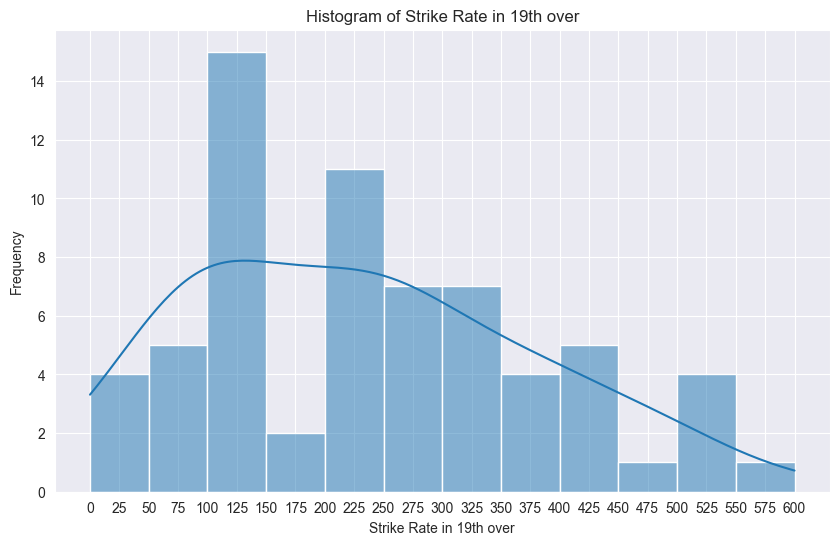

In [94]:
#plot distribution of strike rate in 19th over as percetange
plt.figure(figsize=(10,6))
sns.histplot(batsman_runs_100['strike_rate_19th_over'],bins=range(0,601,50),kde=True)
plt.xticks(range(0,601,25))
plt.xlabel("Strike Rate in 19th over")
plt.ylabel("Frequency")
plt.title("Histogram of Strike Rate in 19th over")
plt.show()



In [95]:
#percentage below 100 and above 100
print("Percentage of batters with strike rate below 100: ",round((batsman_runs_100[batsman_runs_100['strike_rate_19th_over']<100].shape[0]/batsman_runs_100.shape[0])*100,2))
print("Percentage of batters with strike rate above 100: ",round((batsman_runs_100[batsman_runs_100['strike_rate_19th_over']>100].shape[0]/batsman_runs_100.shape[0])*100,2))


Percentage of batters with strike rate below 100:  13.64
Percentage of batters with strike rate above 100:  69.7


In [96]:
#for batters who faced atleast 2 balls,find strike rate
batsman_runs_2=batsman_runs_100[batsman_runs_100['balls_faced_19th_over']>=2]
batsman_runs_2

,batsman_id,year,match_id,innings_no,batsman_runs,runs_19th_over,balls_faced_19th_over,strike_rate_19th_over
0,1934.0,2011,501210,1.0,100.0,13.0,4,325.000000
1,4176.0,2011,501260,1.0,106.0,10.0,2,500.000000
2,4382.0,2008,335990,1.0,117.0,11.0,5,220.000000
3,6256.0,2008,335983,1.0,116.0,9.0,3,300.000000
4,6315.0,2010,419139,2.0,110.0,8.0,2,400.000000
7,7568.0,2013,598027,1.0,175.0,3.0,3,100.000000
8,7568.0,2018,1136576,1.0,104.0,3.0,3,100.000000
10,7793.0,2011,501206,2.0,120.0,8.0,4,200.000000
11,8107.0,2012,548321,2.0,103.0,2.0,2,100.000000
12,8999.0,2018,1136606,2.0,100.0,2.0,3,66.666667


In [98]:
#percentage below 100 and above 100
print("Percentage of batters with strike rate below 100 in 19th over,minimum 2 balls faced: ",round((batsman_runs_2[batsman_runs_2['strike_rate_19th_over']<100].shape[0]/batsman_runs_2.shape[0])*100,2))
print("Percentage of batters with strike rate above 100,minimum 2 balls faced: ",round((batsman_runs_2[batsman_runs_2['strike_rate_19th_over']>100].shape[0]/batsman_runs_2.shape[0])*100,2))


Percentage of batters with strike rate below 100 in 19th over,minimum 2 balls faced:  12.96
Percentage of batters with strike rate above 100,minimum 2 balls faced:  77.78


In [99]:
#for batters who faced atleast 2 balls,find strike rate
batsman_runs_3 = batsman_runs_100[batsman_runs_100['balls_faced_19th_over'] >= 3]
batsman_runs_3
#percentage below 100 and above 100
print("Percentage of batters with strike rate below 100 in 19th over,minimum 3 balls faced: ",
      round((batsman_runs_3[batsman_runs_3['strike_rate_19th_over'] < 100].shape[0] / batsman_runs_3.shape[0]) * 100,
            2))
print("Percentage of batters with strike rate above 100,minimum 3 balls faced: ",
      round((batsman_runs_3[batsman_runs_3['strike_rate_19th_over'] > 100].shape[0] / batsman_runs_3.shape[0]) * 100,
            2))

Percentage of batters with strike rate below 100 in 19th over,minimum 3 balls faced:  13.64
Percentage of batters with strike rate above 100,minimum 3 balls faced:  79.55


## verdict : 80% of batters who scored a hundred and faced atleast 3 balls in 19th over have a strike rate above 80